### Import Necesssary Libraries

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

import time
import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [3]:
import zipfile
import os

In [11]:
!kaggle datasets download -d mlg-ulb/creditcardfraud


  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|▏         | 1.00M/66.0M [00:01<01:23, 817kB/s]
  3%|▎         | 2.00M/66.0M [00:01<00:49, 1.36MB/s]
  5%|▍         | 3.00M/66.0M [00:01<00:31, 2.08MB/s]
  6%|▌         | 4.00M/66.0M [00:02<00:24, 2.66MB/s]
  8%|▊         | 5.00M/66.0M [00:02<00:19, 3.21MB/s]
  9%|▉         | 6.00M/66.0M [00:02<00:16, 3.86MB/s]
 11%|█         | 7.00M/66.0M [00:02<00:14, 4.19MB/s]
 12%|█▏        | 8.00M/66.0M [00:02<00:13, 4.43MB/s]
 14%|█▎        | 9.00M/66.0M [00:03<00:13, 4.49MB/s]
 15%|█▌        | 10.0M/66.0M [00:03<00:11, 4.90MB/s]
 17%|█▋        | 11.0M/66.0M [00:03<00:11, 4.84MB/s]
 18%|█▊        | 12.0M/66.0M [00:03<00:11, 4.92MB/s]
 20%|█▉        | 13.0M/66.0M [00:03<00:10, 5.13MB/s]
 21%|██        | 14.0M/66.0M [00:04<00:10, 5.36MB/s]
 23%|██▎       | 15.0M/66.0M [00:04<00:10, 5.28MB/s]
 24%|██▍       | 16.0M/66.0M [00:04<00:09, 5.46MB/s]
 26%|██▌       | 17.0M/66.0M [00:04<00:09, 5.64MB/s]
 27%|██▋       | 18.0M/66.0M [00:04<00:09, 5.47MB/s]
 2

In [12]:
zipfile_path = 'creditcardfraud.zip'

with zipfile.ZipFile(zipfile_path, 'r') as zip_ref:
    zip_ref.extractall()

os.remove(zipfile_path)

In [13]:
raw_data = pd.read_csv('creditcard.csv')
print(f'There are {str(len(raw_data))} observations in the credit card fraud dataset')
print(f'There are {str(len(raw_data.columns))} variables in the dataset.')

There are 284807 observations in the credit card fraud dataset
There are 31 variables in the dataset.


In [14]:
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


##### Inflating the dataset to ten times as an actual financial institution may have access to much larger dataset

In [18]:
n_replicas = 10
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis = 0), columns=raw_data.columns)

print(str(len(big_raw_data)) + " observations in inflated data")
print(str(len(big_raw_data.columns)) + " variables in the dataset")

2848070 observations in inflated data
31 variables in the dataset


In [19]:
big_raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


<p>Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable is called class and represents the target variable. The objective here is to train the model that used the other variables to predict the value of the class variable. Retriving basic statistics on the target variable.</p>

<p>In this dataset to retain confidentiality, the column names are renamed from V1 to V28. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise.</p>

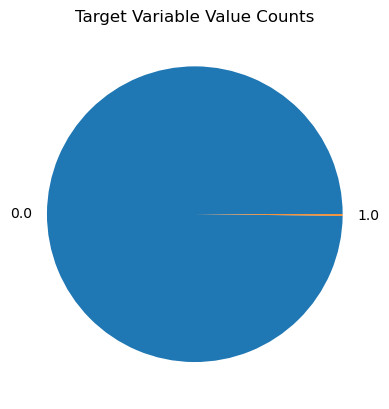

In [23]:
# Getting distict classes
labels = big_raw_data.Class.unique()

# Counts of each class
sizes = big_raw_data.Class.value_counts().values

# Plotting class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels = labels)
ax.set_title('Target Variable Value Counts')
plt.show()

<p>Here, the data is highly unbalanced. We need to balance all the categories</p>

<h4>Plotting Amounts</h4>

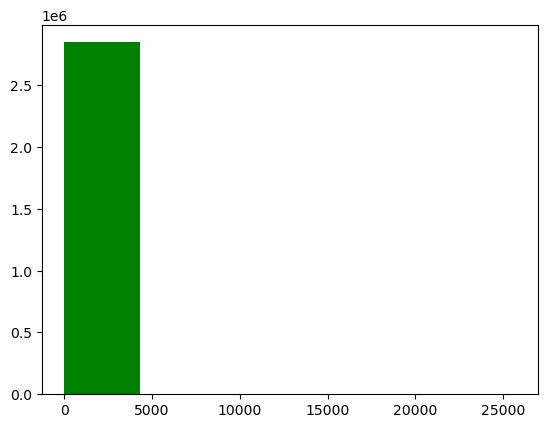

In [24]:
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

In [25]:
print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


### Data Preprocessing

<p>Standardizing features bt removing the mean and scaling to unit variance</p>

In [26]:
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])

In [27]:
data_matrix = big_raw_data.values
X = data_matrix[:, 1:30]
y = data_matrix[:, 30]
X = normalize(X, norm='l1')
print(f'X shape: {X.shape}\ny shape: {y.shape}')

X shape: (2848070, 29)
y shape: (2848070,)


### Train test split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1993649, 29) (854421, 29) (1993649,) (854421,)


### Model Building

In [29]:
w_train = compute_sample_weight('balanced', y_train)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)

t0 = time.time()
dt.fit(X_train, y_train, sample_weight = w_train)
tfinal = time.time() - t0
print(f'[Scikit-Learn] Training time (sec): {tfinal}')

[Scikit-Learn] Training time (sec): 39.76326894760132


### DecisionTree model with Snap ML

In [34]:
from snapml import DecisionTreeClassifier

In [36]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=42, n_jobs=4)

t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight = w_train)
tfinal_snap = time.time() - t0
print(f'[Scikit-Learn] Training time (sec): {tfinal_snap}')

[Scikit-Learn] Training time (sec): 2.418818712234497


### Models Evaluation

In [37]:
training_speedup = tfinal/tfinal_snap
print(f'[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup: {training_speedup}')

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup: 16.439127391596923


In [38]:
sklearn_pred = dt.predict_proba(X_test)[:,1]
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print(f'[Scikit-Learn] ROC-AUC Score: {sklearn_roc_auc}')

snapml_pred = snapml_dt.predict_proba(X_test)[:,1]
snapml_roc_auc =roc_auc_score(y_test, snapml_pred)
print(f'[Snap ML] ROC-AUC Score: {snapml_roc_auc}')

[Scikit-Learn] ROC-AUC Score: 0.9662628370593128
[Snap ML] ROC-AUC Score: 0.9660978435927898


#### We can conclude that Snap ML library has faster models compared to Scikit-Learn.

### Building SVM using Scikit-Learn

In [39]:
from sklearn.svm import  LinearSVC

In [40]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=42, loss='hinge', fit_intercept=False)

t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  48.35


### Building SVM using Snap ML

In [41]:
from snapml import SupportVectorMachine

In [42]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=42, n_jobs=4, fit_intercept=False)

t0 = time.time()
snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  7.21


### Evaluating both models

In [43]:
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 6.71x 


In [44]:
sklearn_pred = sklearn_svm.decision_function(X_test)
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

snapml_pred = snapml_svm.decision_function(X_test)
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985
